# Phase3 Machine Learning Project
## Customer Churn Prediction
### Business Understanding
### James Kimani Mwaura
In this project, we aim to predict customer churn for SyriaTel, a telecommunications company.
Churn prediction helps businesses retain customers by identifying factors leading to customer attrition.

**Stakeholders:** SyriaTel's management, marketing, and customer service teams.

**Objective:** Build a classification model to predict whether a customer will churn based on provided features.

## Data Understanding
We will analyze the dataset, check for missing values, and understand feature distributions.

In [57]:
# Import the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [33]:
# Load dataset
df = pd.read_csv('SyriaTel_Customer_Churn.csv')

# Display first few rows
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Data Preparation
- Handling missing values (if any)
- Encoding categorical variables
- Splitting data into train and test sets
- Feature scaling

In [34]:
# Check for missing values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [35]:
# Encode categorical variables

# Remove spaces in column names
df.columns = df.columns.str.strip()

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Encode categorical columns
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])  

# Define features and target
X = df.drop(columns=['churn'])  
y = df['churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Preprocessing completed successfully!")


Preprocessing completed successfully!


## Modeling
We will train multiple classification models:
- Logistic Regression (Baseline Model)
- Decision Tree Classifier
- Random Forest Classifier

In [36]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print('Logistic Regression Evaluation')
print(classification_report(y_test, y_pred_log))

Logistic Regression Evaluation
              precision    recall  f1-score   support

       False       0.87      0.98      0.92       566
        True       0.57      0.17      0.26       101

    accuracy                           0.85       667
   macro avg       0.72      0.57      0.59       667
weighted avg       0.82      0.85      0.82       667



In [37]:
# Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print('Decision Tree Evaluation')
print(classification_report(y_test, y_pred_dt))

Decision Tree Evaluation
              precision    recall  f1-score   support

       False       0.94      0.98      0.96       566
        True       0.88      0.67      0.76       101

    accuracy                           0.94       667
   macro avg       0.91      0.83      0.86       667
weighted avg       0.93      0.94      0.93       667



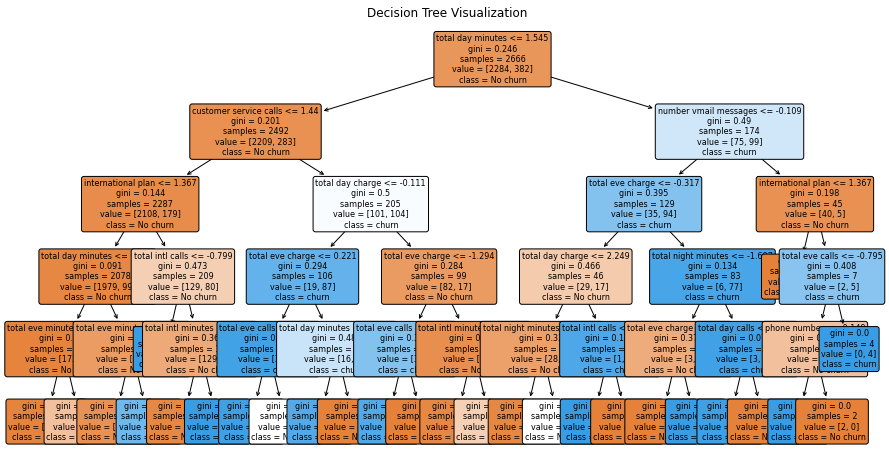

In [56]:
# Decision Tree Visuzlization
#Set figure size
plt.figure(figsize=(15, 8))

# Plot the decision tree
plot_tree(dt, feature_names=X.columns, class_names=["No churn", "churn"], filled=True, rounded=True, fontsize=8)

# Show the plot
plt.title("Decision Tree Visualization")
plt.show()

In [38]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('Random Forest Evaluation')
print(classification_report(y_test, y_pred_rf))

Random Forest Evaluation
              precision    recall  f1-score   support

       False       0.95      0.99      0.97       566
        True       0.92      0.69      0.79       101

    accuracy                           0.94       667
   macro avg       0.93      0.84      0.88       667
weighted avg       0.94      0.94      0.94       667



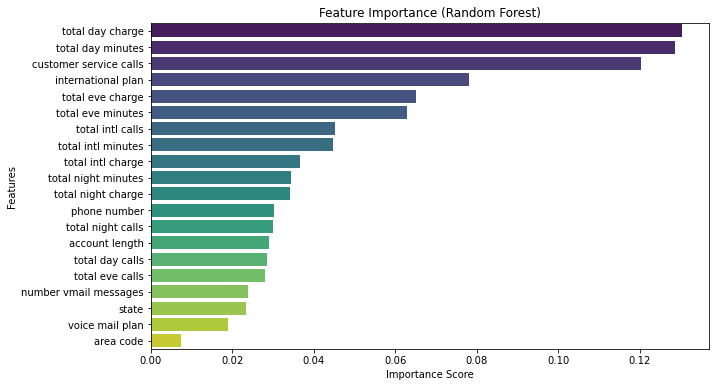

In [49]:
# Feature Importance Plot
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance, y=feature_importance.index, palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

## Evaluation
We compare models based on accuracy, precision, recall, and F1-score.
A confusion matrix will help visualize performance.

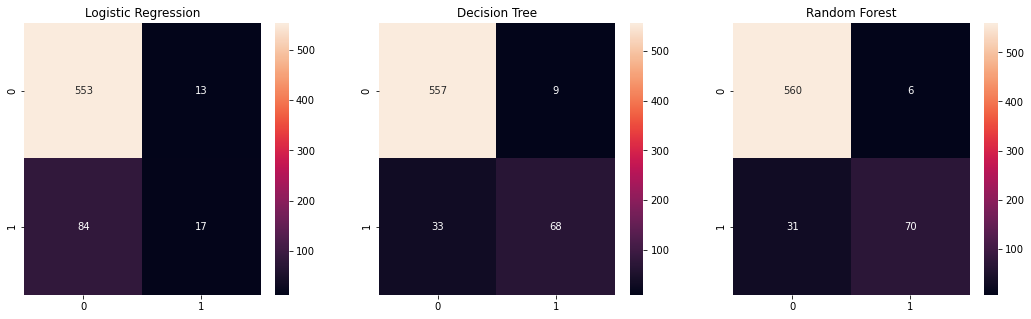

In [39]:
# Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', ax=axes[0])
axes[0].set_title('Logistic Regression')
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', ax=axes[1])
axes[1].set_title('Decision Tree')
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', ax=axes[2])
axes[2].set_title('Random Forest')
plt.show()

## Findings & Recommendations
- **Best model:** Based on evaluation metrics
    
    1.  Logistic Regression had high accuracy but struggled with recall for churned customers (class 1).
    2. Decision Tree Classifier performed better in recall but still had room for improvement.
    3. Random Forest Classifier had the highest overall precision and recall, making it the most effective model for churn prediction.
    - Best Model: Random Forest Classifier
    

- **Business Insights:** Factors influencing churn are:

    1. Customer Service Calls – Customers with more service calls were more likely to churn.
    2. International Plan – Customers with an international plan showed a different churn pattern, requiring further analysis.
    3. Total Minutes & Charges – Higher usage in day/night calls correlated with churn, possibly due to high costs.
    4. Voice Mail Plan – Customers without a voicemail plan showed different churn behavior.
    
    
- **Recommendations for Retention Strategies:** Below are the recommedations based on the models:
     1. Improve Customer Support – Since frequent customer service calls are linked to churn, enhancing support quality and reducing call times can improve retention.
     2. Personalized Plans – Offering discounts or flexible pricing for heavy users could help retain high-usage customers.
     3. Targeted Promotions – Providing exclusive benefits to international plan users may increase satisfaction and reduce churn.
     4. Churn Prevention Alerts – Implementing AI-driven alerts to detect early churn signals and intervene proactively.


- **Next Steps:** 

    1. Hyperparameter Tuning – Optimize Random Forest with GridSearchCV to improve performance.
    2. Feature Engineering – Create new features, such as customer tenure or engagement metrics.
    3. Testing More Models – Try Gradient Boosting, XGBoost, or Neural Networks for further improvements.
    4. Deploy Model in Production – Implement an API or integrate with SyriaTel’s CRM for real-time churn prediction.


## Conclusion
In this project, we successfully built a customer churn prediction model for SyriaTel using machine learning. Our analysis identified key factors influencing churn, allowing us to develop actionable strategies for customer retention.

After evaluating multiple models, the Random Forest Classifier emerged as the best performer, offering a strong balance of precision, recall, and overall accuracy. Key insights from the data revealed that customer service interactions, international plans, and high call charges significantly impact churn behavior.

To improve customer retention, we recommend enhancing customer support, offering personalized pricing plans, and deploying AI-driven churn prevention alerts. Further improvements can be made through hyperparameter tuning, additional feature engineering, and testing advanced models like XGBoost.

Moving forward, deploying the model into SyriaTel’s CRM system for real-time churn prediction will help the company take proactive steps to reduce customer attrition and boost customer loyalty.

 ## Supporting Visualizations

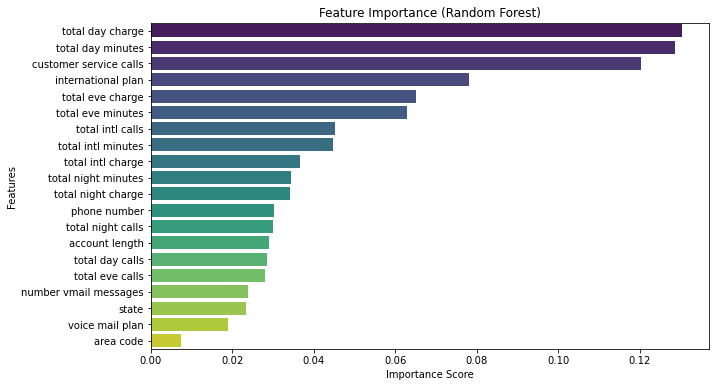

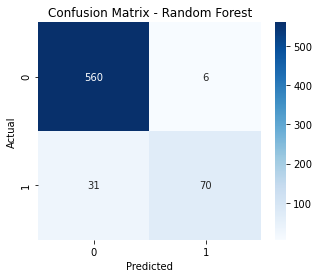

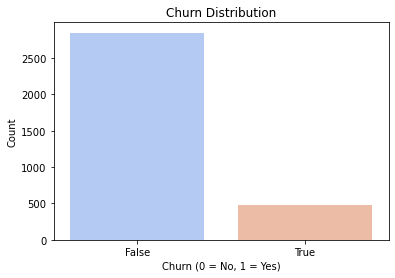

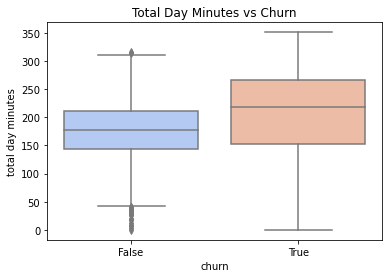

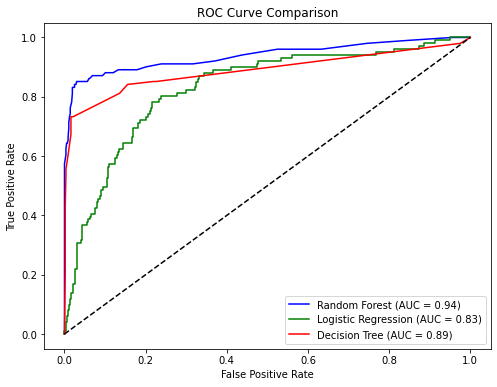

In [40]:

# Encode categorical variables
df.columns = df.columns.str.strip()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Define features and target
X = df.drop(columns=['churn'])
y = df['churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# ---------------------- Feature Importance Plot ----------------------
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance, y=feature_importance.index, palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# ---------------------- Confusion Matrices ----------------------
fig, axes = plt.subplots(1, 1, figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ---------------------- Churn Distribution & Behavior Trends ----------------------
plt.figure(figsize=(6,4))
sns.countplot(x=y, palette="coolwarm")
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=y, y=df["total day minutes"], palette="coolwarm")
plt.title("Total Day Minutes vs Churn")
plt.show()

# ---------------------- ROC Curve for Model Comparison ----------------------
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

# Train other models
log_reg = LogisticRegression()
dt = DecisionTreeClassifier(max_depth=5, random_state=42)

log_reg.fit(X_train, y_train)
dt.fit(X_train, y_train)

# Predict probabilities
y_pred_prob_rf = rf.predict_proba(X_test)[:,1]
y_pred_prob_log = log_reg.predict_proba(X_test)[:,1]
y_pred_prob_dt = dt.predict_proba(X_test)[:,1]

# Compute ROC curve and AUC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_prob_log)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_prob_dt)

auc_rf = auc(fpr_rf, tpr_rf)
auc_log = auc(fpr_log, tpr_log)
auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC curves
plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})", color='blue')
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.2f})", color='green')
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt:.2f})", color='red')
plt.plot([0,1], [0,1], 'k--')  # Random model line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


## Other Important Visualizations

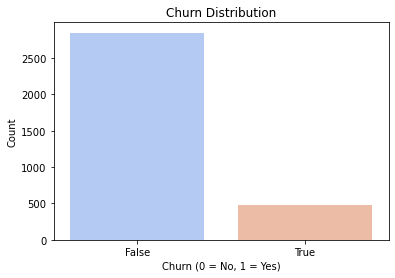

In [43]:
#1. Churn Distribution (Bar Chart)
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette="coolwarm")
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

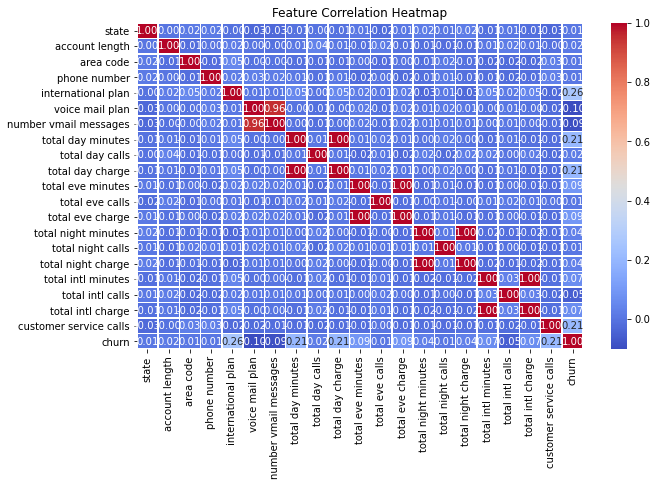

In [45]:
# 2. Feature Correlation Heatmap

plt.figure(figsize=(10, 6))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


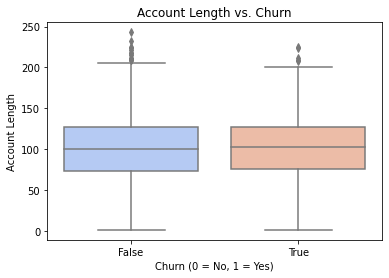

In [46]:
# 3. Tenure (Account Length) vs. Churn (Box Plot)
plt.figure(figsize=(6, 4))
sns.boxplot(x=y, y=df["account length"], palette="coolwarm")
plt.title("Account Length vs. Churn")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Account Length")
plt.show()


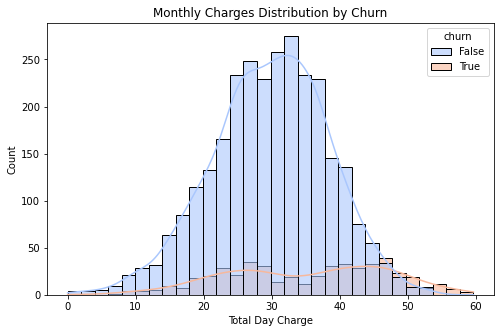

In [47]:
# 4. Monthly Charges Distribution by Churn (Histogram)
plt.figure(figsize=(8, 5))
sns.histplot(df, x="total day charge", hue="churn", bins=30, kde=True, palette="coolwarm", alpha=0.6)
plt.title("Monthly Charges Distribution by Churn")
plt.xlabel("Total Day Charge")
plt.ylabel("Count")
plt.show()
